In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import os
import enzope

In [2]:
def run(t_s, f, w_min, reps):
    w_s = [[] for _ in t_s]
    for _ in tqdm(range(reps)):
        model = enzope.CPUModel(n_agents=1000, f=f, w_min=w_min, measure_every=1)
        
        for i, t in enumerate(t_s):
            model.MCS(t)
            w_s[i].append(model.w.copy())

    # Save w_s
    for i, t in enumerate(t_s):
        np.save(f'data/2/w_t={t}_f={f}_w_min={w_min}.npy', w_s[i])

In [3]:
# Params
reps = 10
t_s = [2000, 5000, 50000, 100000, 200000]
f=.2
w_min = 3e-17

#### Simulation loop

In [4]:
for w_min in [3e-17, 1e-10]:
    for f in [.1, .2]:
        run(t_s, f, w_min, reps)

100%|██████████| 10/10 [5:55:45<00:00, 2134.51s/it] 


In [86]:
f = .1
w_min = 3e-17
w_ts = [np.array(np.load(f'data/2/w_t={t}_f={f}_w_min={w_min}.npy')).flatten() for t in t_s]
w_ts_actives = [w_t[w_t > w_min] for w_t in w_ts]

In [87]:
n = len(w_ts[0])
n_actives = [len(w_t[w_t > w_min]) / n for w_t in w_ts]

print ("---ACTIVOS---")
for t, actives in zip(t_s, n_actives):
    print(f'At t={t}: {actives:.2f}')
print()
print ("---MAS RICO---")
for t, w_t in zip(t_s, w_ts_actives):
    print(f'At t={t}: {np.max(w_t):.2e}')

---ACTIVOS---
At t=2000: 0.43
At t=5000: 0.38
At t=50000: 0.34
At t=100000: 0.33
At t=200000: 0.32

---MAS RICO---
At t=2000: 2.52e-01
At t=5000: 2.39e-01
At t=50000: 9.11e-02
At t=100000: 8.40e-02
At t=200000: 1.40e-01


(-0.0006000000000000001, 0.0205)

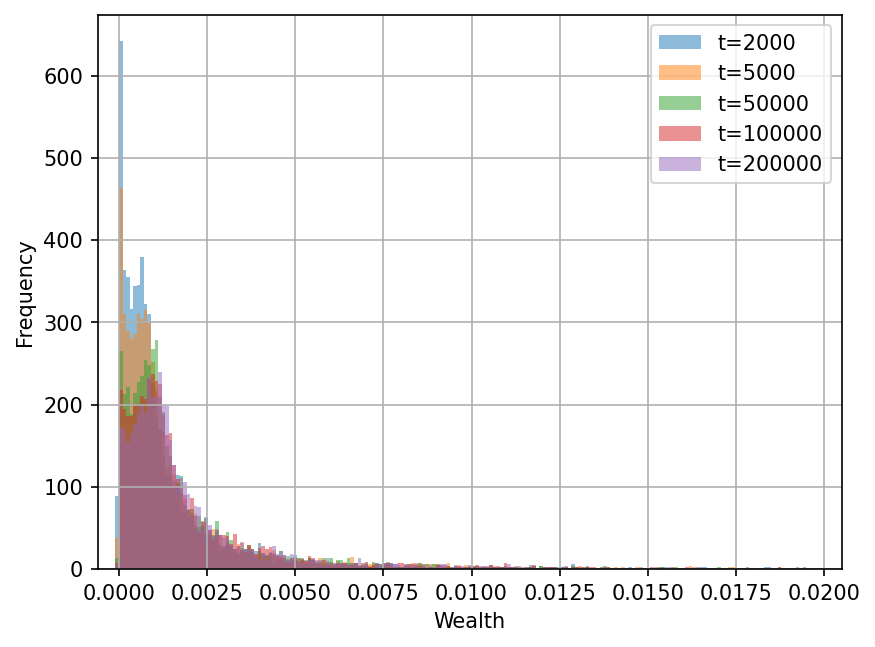

In [80]:
# Two plots side by side
fig, ax = plt.subplots(dpi=150)

xmin = -.0001
xmax = .02

bines = np.linspace(xmin, xmax, 200)

for i, t in enumerate(t_s):
    ax.hist(w_ts_actives[i], bins=bines, label=f't={t}', alpha=.5, histtype='stepfilled', density=False)
ax.legend()
ax.set_xlabel('Wealth')
ax.set_ylabel('Frequency')
ax.grid()

# ymax = 7500
# ax.set_ylim(0, ymax)
margins = .0005
ax.set_xlim(xmin - margins, xmax + margins)

(-0.0015, 0.1005)

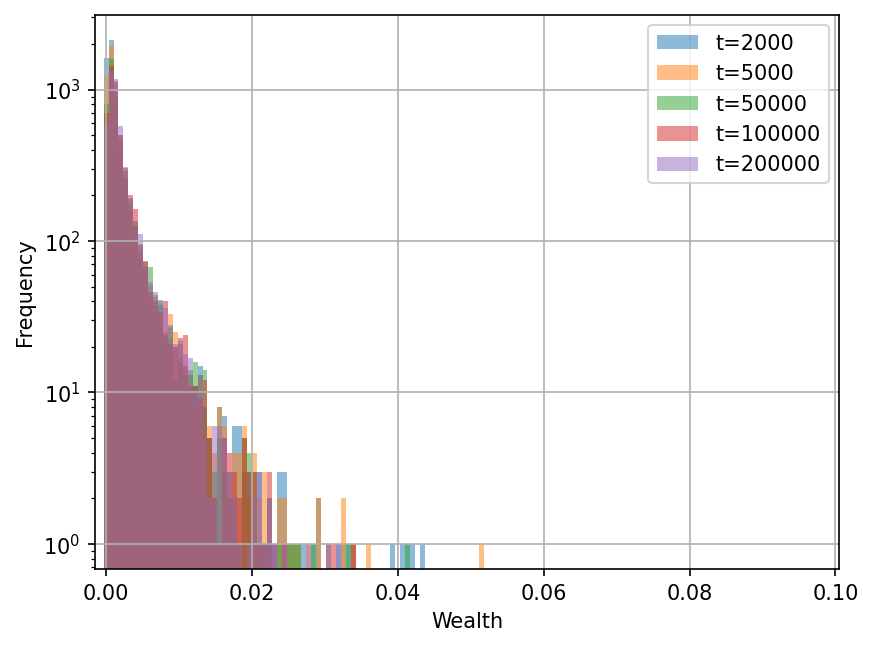

In [79]:
fig, ax = plt.subplots(dpi=150)

xmin = -.001
xmax = .1

bines = np.linspace(xmin, xmax, 150)

for i, t in enumerate(t_s):
    ax.hist(w_ts_actives[i], bins=bines, label=f't={t}', alpha=.5, histtype='stepfilled', density=False)
ax.legend()
ax.set_xlabel('Wealth')
ax.set_ylabel('Frequency')
ax.grid()

ax.set_yscale('log')

# ymax = 2000
# ax.set_ylim(0, ymax)
margins = .0005
ax.set_xlim(xmin - margins, xmax + margins)

In [16]:
np.max(w_t3)

0.06800005